## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/Projects/VR Experiences/vr_exp.csv')

In [ ]:
df.set_index('UserID',inplace=True)

In [ ]:
bins = [18,30, 40, 50 ,60 ,70]
labels = ['20s','30s','40s','50s','60s']
df['age_bins'] = pd.cut(df['Age'],bins,right=False,labels=labels)



In [ ]:
df.tail()

,Age,Gender,VRHeadset,Duration,MotionSickness,ImmersionLevel,age_bins
UserID,,,,,,,
996,30,Male,HTC Vive,14.656763,9,2,30s
997,57,Other,Oculus Rift,25.172419,7,5,50s
998,35,Other,PlayStation VR,37.576139,7,2,30s
999,52,Male,PlayStation VR,27.567473,7,2,50s
1000,46,Female,PlayStation VR,37.511141,7,3,40s


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             1000 non-null   int64   
 1   Gender          1000 non-null   object  
 2   VRHeadset       1000 non-null   object  
 3   Duration        1000 non-null   float64 
 4   MotionSickness  1000 non-null   int64   
 5   ImmersionLevel  1000 non-null   int64   
 6   age_bins        1000 non-null   category
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 55.9+ KB


In [ ]:
df.drop_duplicates(inplace=True)

## **Central Tendency and Dispersions**

In [ ]:
df.describe()

,Age,Duration,MotionSickness,ImmersionLevel
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.178000,32.576660,5.526000,2.976000
std,12.050208,15.764659,2.866625,1.409756
min,18.000000,5.008672,1.000000,1.000000
25%,29.000000,18.733748,3.000000,2.000000
50%,39.000000,32.368611,6.000000,3.000000
75%,49.000000,45.343732,8.000000,4.000000
max,60.000000,59.983723,10.000000,5.000000


Looking at our measures, we note the following:
- On average,
  - Participants were around 39
  - Participants used VR headsets for about 32 minutes.
  - Participants reported experiencing lots of motion sickness
  - Participants reported a 3 for experiencing ImmersionLevel

## **Data Distributions**

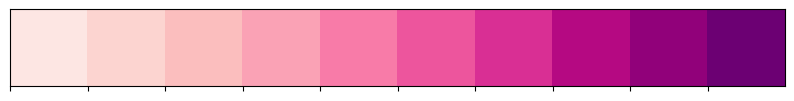

In [ ]:
sequential_colors = sns.color_palette("RdPu", 10)
sns.palplot(sequential_colors)

<ipython-input-17-e69264753f76>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],ax=ax1,color=sequential_colors[6])
<ipython-input-17-e69264753f76>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Duration'],ax=ax2,color=sequential_colors[6])
<ipython-input-17-e69264753f76>:9: User

Text(0.5, 0, 'ImmersionLevel')

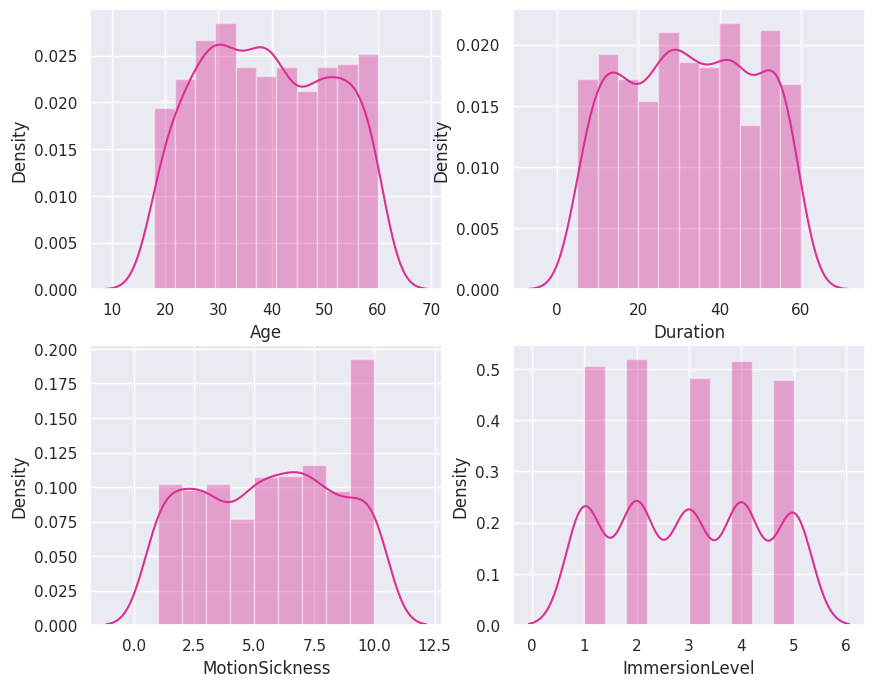

In [ ]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,8))

sns.distplot(df['Age'],ax=ax1,color=sequential_colors[6])
ax1.set_xlabel('Age')

sns.distplot(df['Duration'],ax=ax2,color=sequential_colors[6])
ax2.set_xlabel('Duration')

sns.distplot(df['MotionSickness'],ax=ax3,color=sequential_colors[6])
ax3.set_xlabel('MotionSickness')

sns.distplot(df['ImmersionLevel'],ax=ax4,color=sequential_colors[6])
ax4.set_xlabel('ImmersionLevel')


**Takeaways:**
- The distribution of the graphs are uniform, generally
- Most participants are around the age of 30
- Most participants spent around 40 minutes using the VR headset
- Most participants rated their experience of motion sickness about a 7
- At least all participants experienced motion sickness
- Most participants reported an ImmersionLevel of a 2

# **Multivarate Analysis**

## **Group by Gender EDA**

**Male, Female, Other Particpant Distribution**

([<matplotlib.patches.Wedge at 0x7f8fdff0ea70>,
 [Text(0.511666228917194, 0.973754419854235, 'Male'),
  Text(-1.0976070028816742, -0.07251804758202414, 'Female'),
  Text(0.5747482806868539, -0.9379042668884204, 'Other')],
 [Text(0.2790906703184694, 0.5311387744659464, '34.6%'),
  Text(-0.5986947288445494, -0.03955529868110407, '32.9%'),
  Text(0.31349906219282936, -0.511584145575502, '32.5%')])

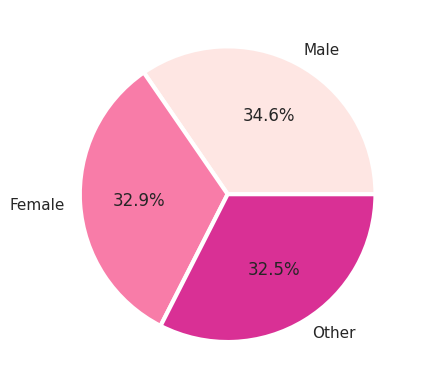

In [ ]:
colors = [sequential_colors[0],sequential_colors[4],sequential_colors[6]]
sns.set()
plt.pie(df['Gender'].value_counts(),autopct='%1.1f%%',labels=['Male','Female','Other'],wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors)

**Takeaways:**
- The distribution of male-female-other class seemed to be balanced

## **Age Group EDA**

In [ ]:
df.groupby(['age_bins','Gender']).mean()

<ipython-input-12-e8350babf57c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['age_bins','Gender']).mean()


Age   Duration  MotionSickness  ImmersionLevel
age_bins Gender                                                      
20s      Female  24.451220  32.167226        5.439024        3.060976
         Male    24.053191  33.350327        5.404255        2.946809
         Other   23.732558  30.337468        5.511628        2.918605
30s      Female  34.838710  30.043792        5.397849        3.064516
         Male    34.317647  32.243783        5.517647        3.070588
         Other   34.564706  36.697574        5.788235        2.729412
40s      Female  43.986301  32.566916        5.438356        3.054795
         Male    44.694444  31.279381        5.513889        3.027778
         Other   44.753086  31.226874        5.814815        2.827160
50s      Female  54.720588  34.516784        5.602941        2.661765
         Male    54.338028  31.829707        5.873239        2.971831
         Other   54.287500  34.407057        5.187500        3.300000
60s      Female  60.000000  35.717778        5.555556        2.777778
         Male    60.000000  36.491506        6.571429        2.857143
         Other   60.000000  31.822425        4.357143        3.428571

**Immersion Level by Age Group and Gender**

In [ ]:
males = df[df['Gender']=='Male']
females = df[df['Gender']=='Female']
other = df[df['Gender']=='Other']

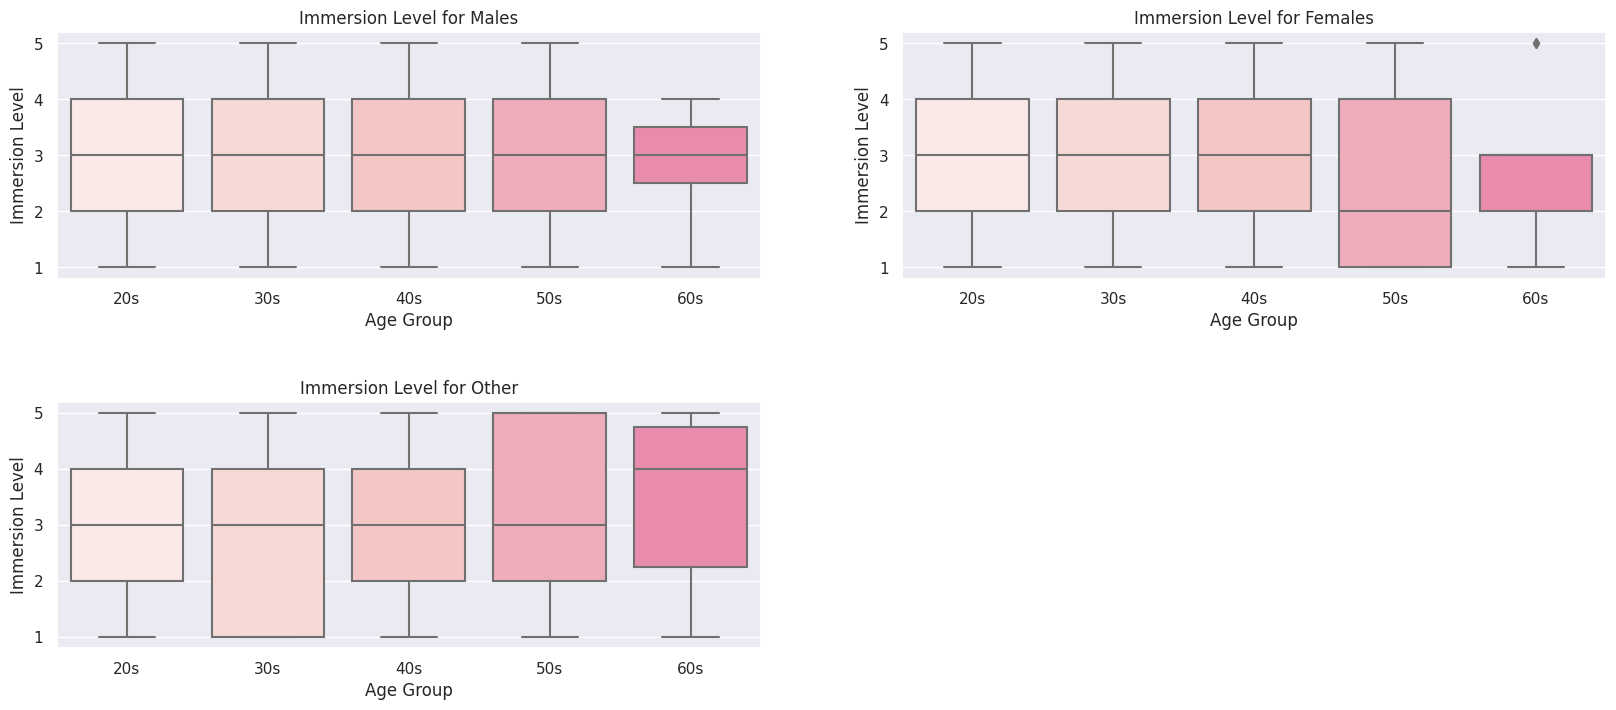

In [ ]:
fig, ((ax1,ax2),(ax3,_)) = plt.subplots(2,2,figsize=(20,8))
groups = [(males,ax1,'Males'),(females,ax2,'Females'),(other,ax3,'Other')]
fig.delaxes(_)
for group in groups:
  plt.subplots_adjust(hspace=0.5)
  sns.boxplot(x='age_bins', y='ImmersionLevel', data=group[0],orient='v',palette=sequential_colors,ax=group[1])
  group[1].set_xlabel('Age Group')
  group[1].set_ylabel('Immersion Level')
  group[1].set_title(f'Immersion Level for {group[2]}')


**Takeaways:**
- Seems like generally, individuals didn't feel super immersed which suggested there should be further questioning or data collection to figure out why individuals provided the ratings for their percieved Immersion Level.

- Those identifying as Other, had the highest reported median Immersion Level

- Those identifying as Female, had the lowest reported median Immersion Level

**ImmersionLevel by Age Group**

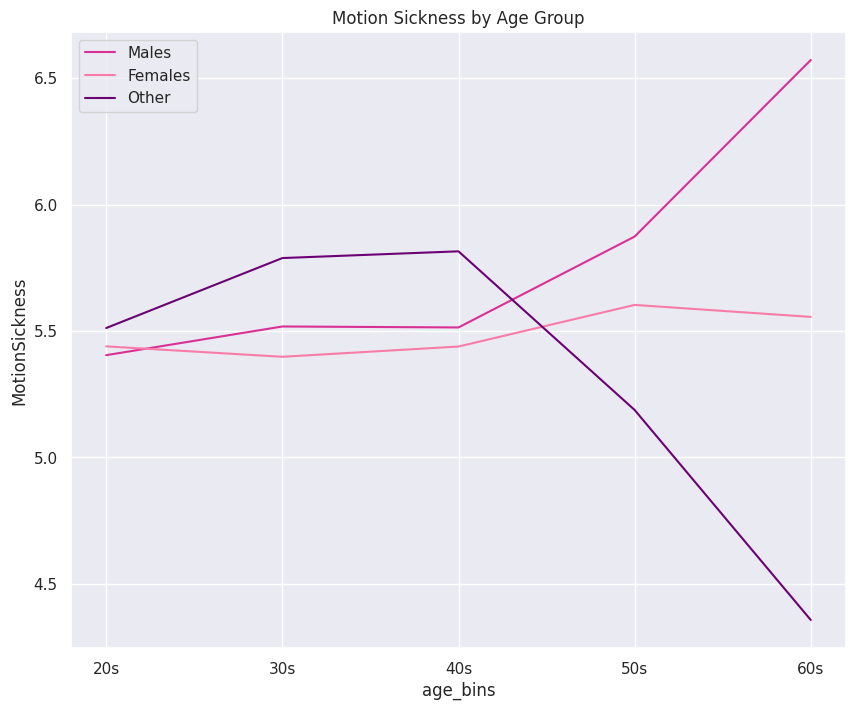

In [ ]:

fig,ax= plt.subplots(figsize=(10,8))

ax.set_title('Motion Sickness by Age Group')
sns.lineplot(x='age_bins', y='MotionSickness', data=males,color=sequential_colors[6],ax=ax,errorbar=None,label='Males')
sns.lineplot(x='age_bins', y='MotionSickness', data=females,color=sequential_colors[4],ax=ax,errorbar=None,label='Females')
sns.lineplot(x='age_bins', y='MotionSickness', data=other,color=sequential_colors[9],ax=ax,errorbar=None,label='Other')
ax.legend()


**Takeaways:**
- Individuals identifying as male seem to experience more motion sickness as they get older

- Those identifying as Other start to experience less motion sickness after their 40s

**Duration by Age Group**

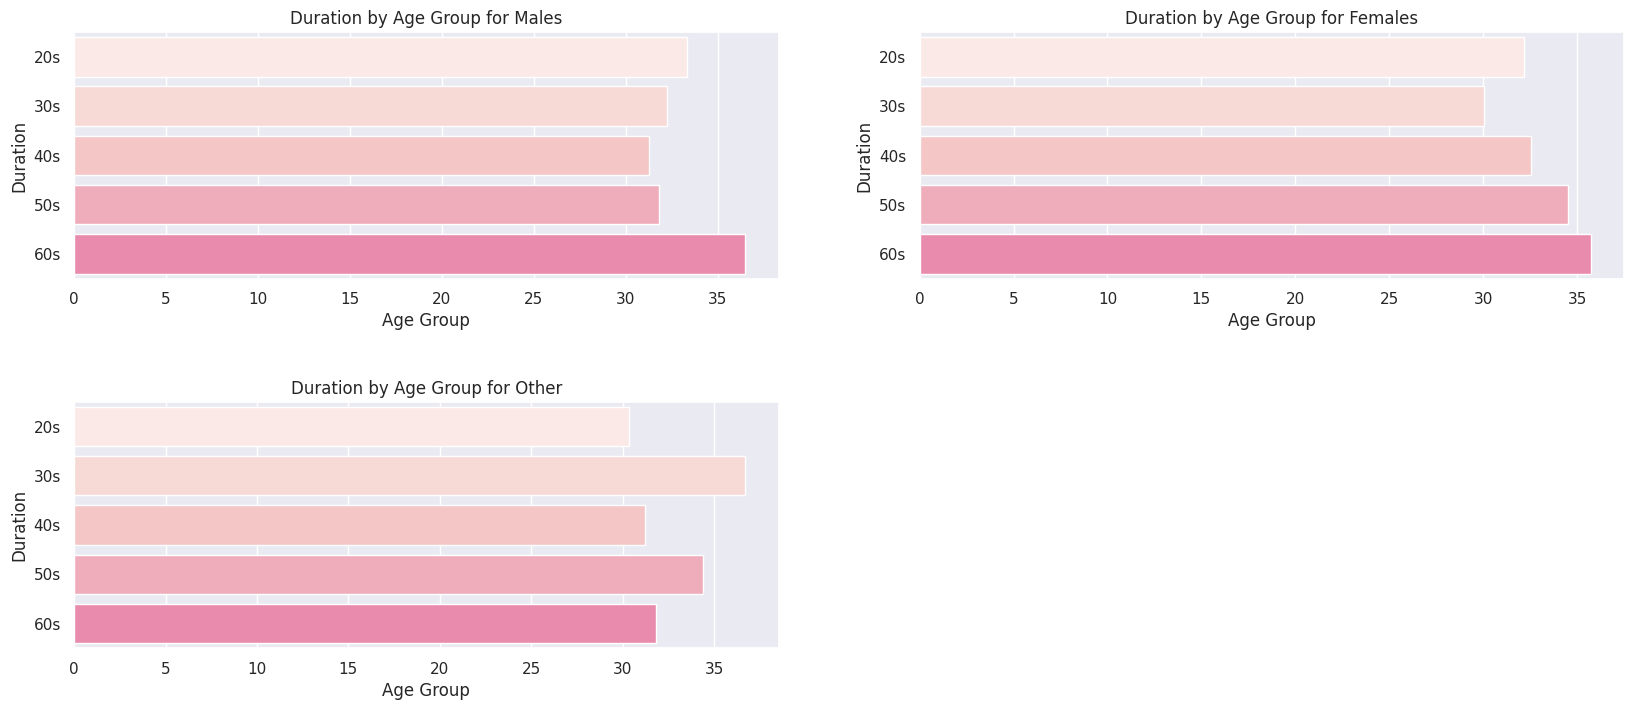

In [ ]:
fig, ((ax1,ax2),(ax3,_)) = plt.subplots(2,2,figsize=(20,8))
groups = [(males,ax1,'Males'),(females,ax2,'Females'),(other,ax3,'Other')]
fig.delaxes(_)
for group in groups:
  plt.subplots_adjust(hspace=0.5)
  sns.barplot(y='age_bins', x='Duration', data=group[0],orient='h',palette=sequential_colors,ax=group[1],errorbar=None)
  group[1].set_xlabel('Age Group')
  group[1].set_ylabel('Duration')
  group[1].set_title(f'Duration by Age Group for {group[2]}')

**Takewaways:**
- Those identify as Males, spend more time in VR as they get older

- Those identifying as Females, spend more time in VR after their 30s

# **VR headset EDA**

## **Frequency Tables**

<Axes: xlabel='age_bins', ylabel='VRHeadset'>

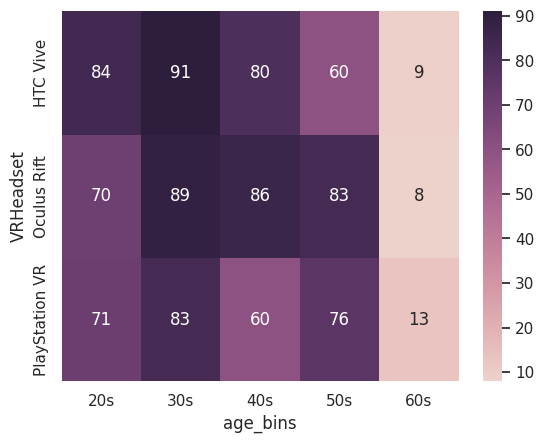

In [ ]:
# Frequency Table
df['VRHeadset'].value_counts()
immer = df.pivot_table(columns='age_bins', index='VRHeadset', aggfunc='size')
sns.heatmap(immer,annot=True,cmap=sns.cubehelix_palette(as_cmap=True))

**Takeaways:**

- Those in their 20s and 30s, mostly used the HTC Vive
- Those in their 40s and 50s, mostly used the Oculus Rift

In [ ]:
vr_gp = df.groupby(['VRHeadset','Gender']).mean()

<ipython-input-280-418b9a9a696b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vr_gp = df.groupby(['VRHeadset','Gender']).mean()


In [ ]:
df.groupby(['VRHeadset'])['MotionSickness','ImmersionLevel'].mean()

<ipython-input-21-6705ba00dd03>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['VRHeadset'])['MotionSickness','ImmersionLevel'].mean()


,MotionSickness,ImmersionLevel
VRHeadset,,
HTC Vive,5.482036,2.940120
Oculus Rift,5.379009,2.982507
PlayStation VR,5.727554,3.006192


It seems that those who used the Playstation VR headset experienced slighly greater feelings of immersion. However, this may not be statstically significant. We can test this later on and develop some hypothesis.

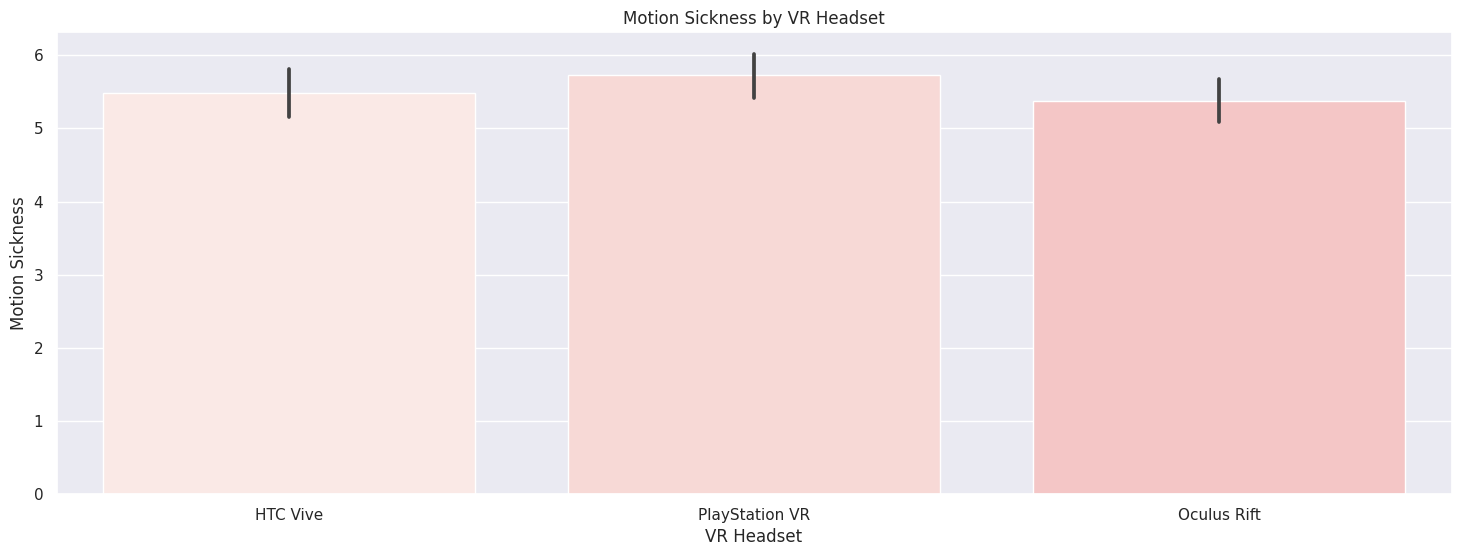

In [ ]:
plt.figure(figsize=(18, 6))
sns.barplot(x='VRHeadset', y='MotionSickness', data=df,palette=sequential_colors)
plt.xlabel('VR Headset')
plt.ylabel('Motion Sickness')
plt.title('Motion Sickness by VR Headset')
plt.show()

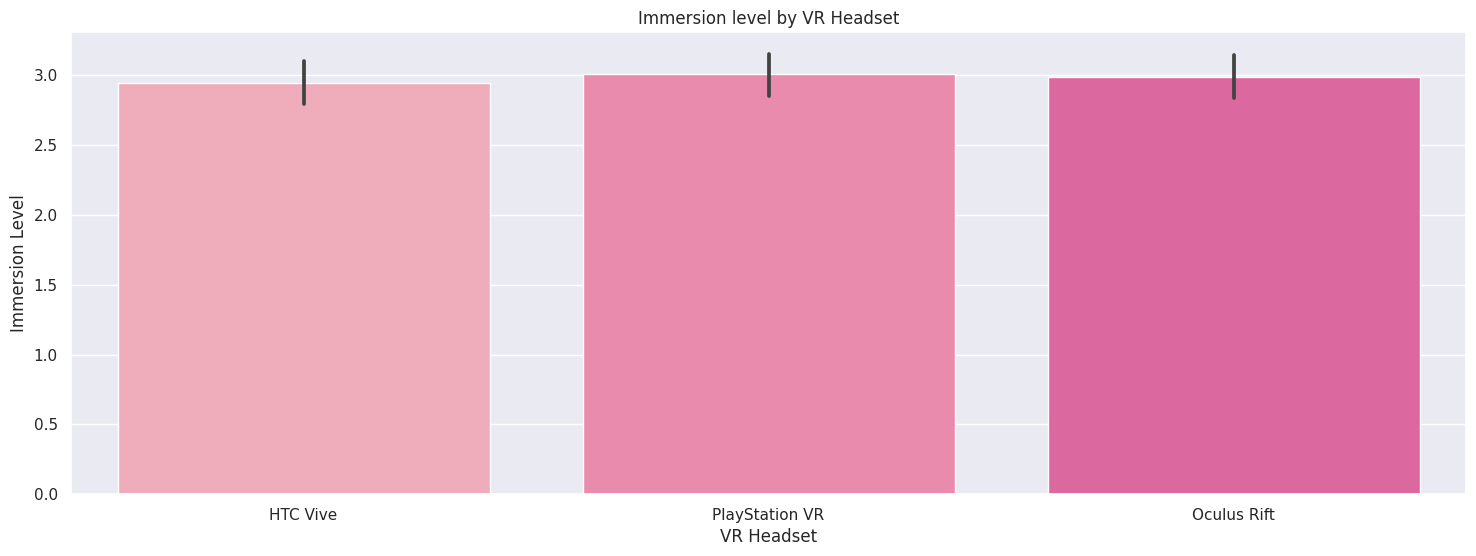

In [ ]:
plt.figure(figsize=(18, 6))
sns.barplot(x='VRHeadset', y='ImmersionLevel', data=df,palette=sequential_colors[3:6])
plt.xlabel('VR Headset')
plt.ylabel('Immersion Level')
plt.title('Immersion level by VR Headset')
plt.show()

## **Correlations**

<ipython-input-313-bddfefdc9c11>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

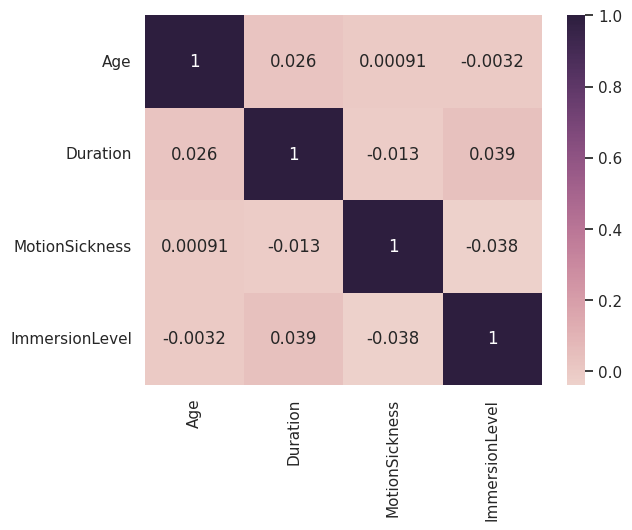

In [ ]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap=sns.cubehelix_palette(as_cmap=True))

**Takeaways:**

- We have little to no correlations among the features

**Further Questions for Exploration**

- Is there a difference between those in their 40s and 50s who used the Oculus Rift compared to those between their 20s and 30s who used the HTC Vive?